# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png" align="center"/>

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

## Implémentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn import linear_model # Le modèle linéaire
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score # Métriques d'évaluation

import seaborn as sns

In [2]:
iris = datasets.load_iris()
print(iris)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'), 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal wid

In [3]:
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
dataset['target'] = np.asarray([iris.target_names[i] for i in iris.target])
print("Chargement des données effectué.")

Chargement des données effectué.


In [4]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Modèle simple

### Données d'entrée

Dans ce premier modèle simple, nous allons essayer de prédire la largeur de la pétale (en cm) en fonction de sa longueur (en cm). L'objectif est de déterminer s'il existe un lien linéaire entre ces deux variables, et si oui, modéliser ce lien par une régression linéaire simple.

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [5]:
X_train = np.expand_dims(dataset['petal length (cm)'], axis=1)
Y_train = dataset['petal width (cm)']

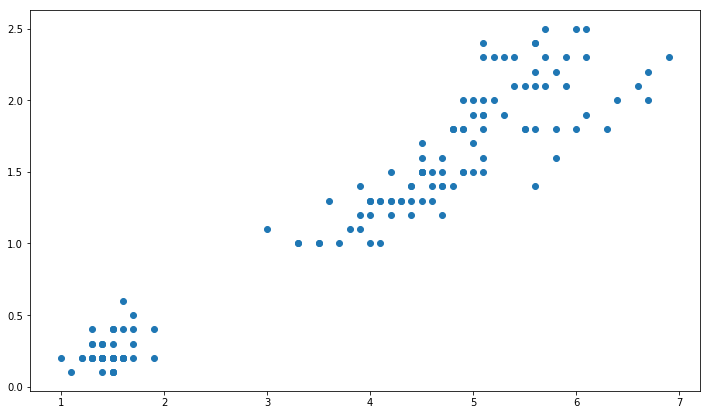

In [6]:
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
plt.show()

### Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [7]:
# On crée l'objet de régression
regr = linear_model.LinearRegression()
# On entraîne le modèle sur notre ensemble d'entraînement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [8]:
# Affichage des coefficients
print('Intercept : \n', regr.intercept_)
print('Coefficients : \n', regr.coef_)

Intercept : 
 -0.3665140452167275
Coefficients : 
 [0.41641913]


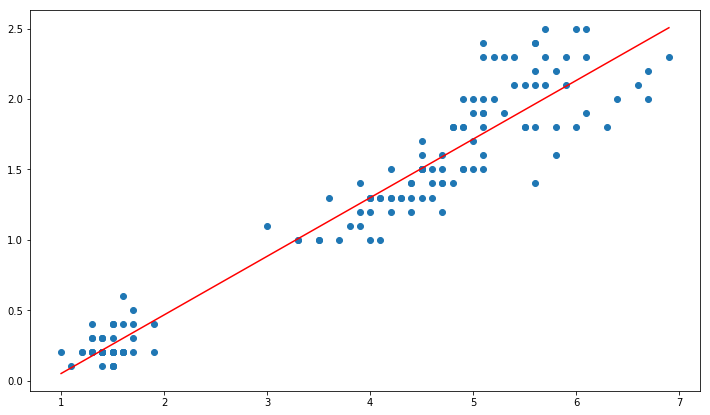

In [9]:
plt.figure(figsize=(12, 7))
plt.scatter(X_train, Y_train)
I = np.asarray([min(X_train), max(X_train)])
plt.plot(I, I * regr.coef_ + regr.intercept_, color="red")
plt.show()

## Modèle multiple

Dans le modèle multiple, on souhaite dorénavant expliquer la longueur des sépales en fonction des trois autres caractéristiques.

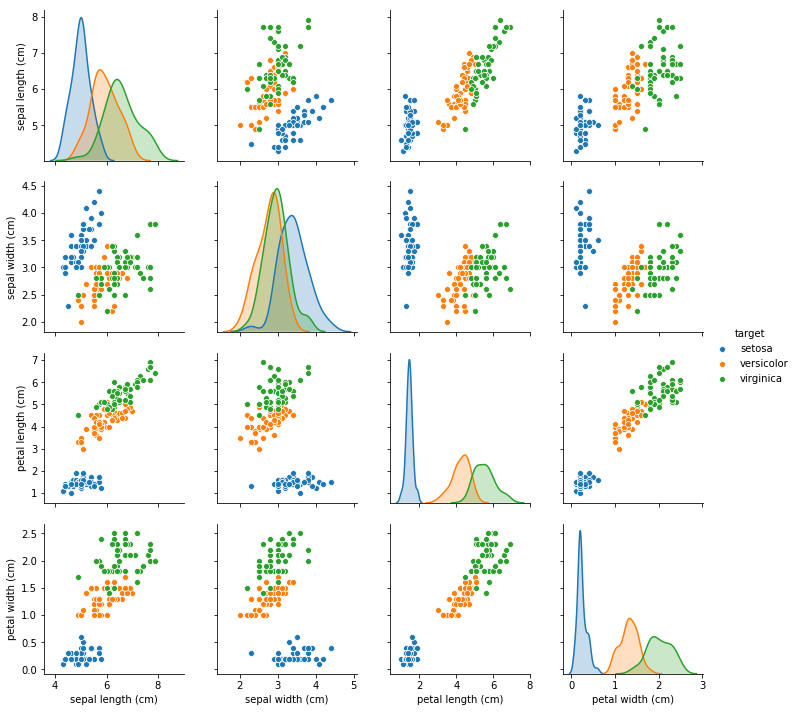

In [10]:
sns.pairplot(dataset, hue='target')

In [11]:
X_train = dataset.loc[:,['petal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
Y_train = dataset['sepal length (cm)']

In [12]:
# On crée l'objet de régression
regr = linear_model.LinearRegression()
# On entraîne le modèle sur notre ensemble d'entraînement
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Affichage des coefficients
print('Intercept : \n', regr.intercept_)
print('Coefficients : \n', regr.coef_)

Intercept : 
 1.845060803216608
Coefficients : 
 [ 0.71106291  0.65486424 -0.56256786]


Interpréter les coefficients.

## Validation du modèle

### Coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\bar{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\bar{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraire, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [14]:
# MSE
Y_pred = regr.predict(X_train)
print("MSE : {:3.2f}".format(mean_squared_error(Y_train, Y_pred)))
# Coefficient de détermination R2
print('Score R2: {:2.1f}%'.format(r2_score(Y_train, Y_pred) * 100))

MSE : 0.10
Score R2: 85.9%


### Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

### Analyse des points leviers

Un point levier est une observation qui apporte une forte contribution à l'estimation des coefficients $\beta$ en regardant uniquement ses composantes explicatives. Pour le détecter, il suffit de tracer les diagonales de la matrice de projection et de sélectionner les points supérieurs à un certain seuil.

La distance de Cook permet également de déterminer des points leviers mais cette fois-ci, en faisant intervenir le paramètre $\hat{\beta}$, c'est-à-dire directement sur l'estimation de $\beta$. Cette distance, une fois simplifiée, s'écrit :

$$C_i=\frac{1}{p} \frac{h_{ii}}{1-h_{ii}}t_i^2$$

Avec $t_i$ le résidu standardisé (analogue au résidu studentisé dont la valeur s'obtient par)
$$t_i=\frac{\hat{\varepsilon}_i}{\hat{\sigma} \sqrt{1-h_{ii}}}$$

### Diagramme Quantile-Quantile

Dernier outils permettant de valider l'hypothèse gaussienne est le QQ-plot : on affiche les quantiles d'une loi normale, puis les quantiles empiriques sur les observations. Il suffit de comparer visuellement : plus les quantiles empiriques sont proches de la droite *normale* (quantiles de la loi normale), plus les observations sont empiriquement proches d'une loi gaussienne.

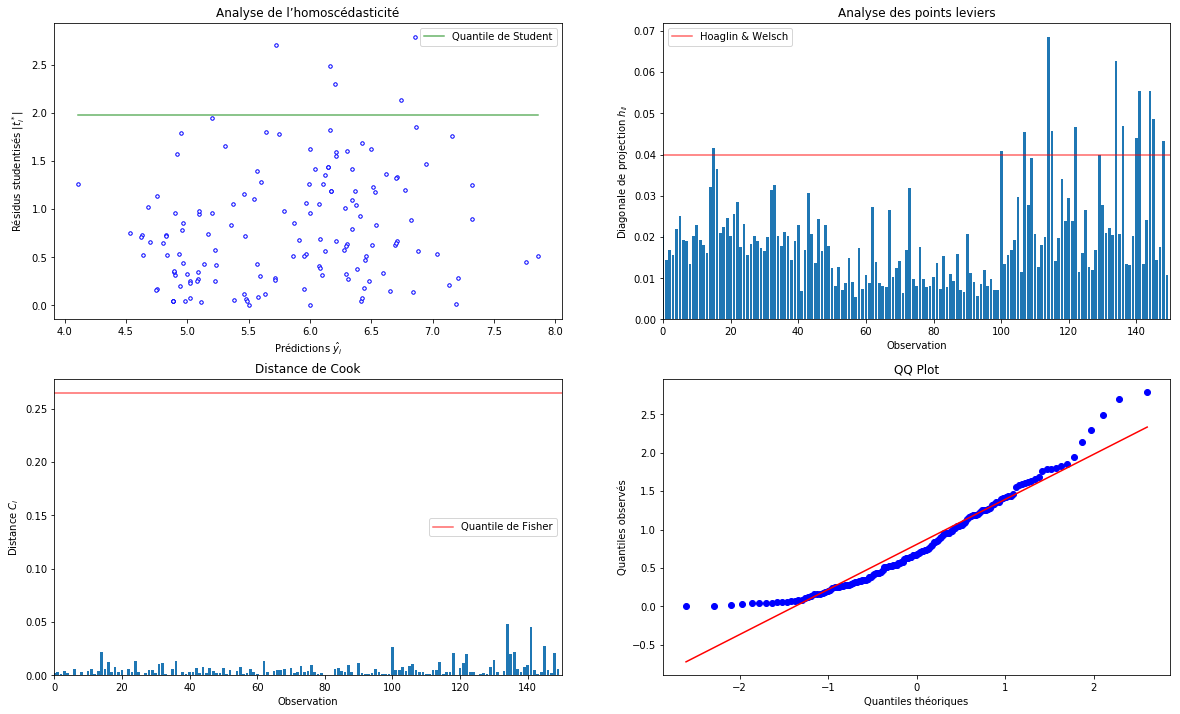

In [15]:
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(Y_train - Y_pred)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()

plt.subplot(222)
plt.bar(range(X_train.shape[0]), [ H[i, i] for i in range(X_train.shape[0]) ])
plt.plot([0, X_train.shape[0]], [2 * X_train.shape[1] / X_train.shape[0], 2 * X_train.shape[1] / X_train.shape[0] ], label="Hoaglin & Welsch", color="red", alpha=0.6)
plt.title("Analyse des points leviers")
plt.xlabel("Observation")
plt.ylabel("Diagonale de projection $h_{ii}$")
plt.xlim(0, X_train.shape[0])
plt.legend()

plt.subplot(223)
plt.bar(range(X_train.shape[0]), cook)
plt.plot([0, X_train.shape[0]], [ scipy.stats.f.ppf(0.1, p, n-p), scipy.stats.f.ppf(0.1, p, n-p)], color="red", alpha=0.6, label="Quantile de Fisher")
plt.title("Distance de Cook")
plt.xlabel("Observation")
plt.ylabel("Distance $C_i$")
plt.xlim(0, X_train.shape[0])
plt.legend()

plt.subplot(224)
plt.title("QQ Plot")
scipy.stats.probplot(student_residuals, plot=plt)
plt.gca().set_title("QQ Plot")
plt.gca().set_ylabel("Quantiles observés")
plt.gca().set_xlabel("Quantiles théoriques")

plt.show()

Comment pouvez-vous analyser ces résultats ?